<font size=10>Laboratory Assignment 3.1</font>

# Introduction
In this laboratory, we will cover the basic element of programming using a map-reduce methodology. For that purpose, we will be using Apache Spark as a reference, but bear in mind that similar frameworks exists and principles can be extrapolated.

## Some concepts and facts

- Spark is a distributed computing platform that operates on a cluster. Like MPI, we expect that nodes does NOT share a memory space but they are connected in high-speed dedicated network. Distributed filesystems that work over the network are extremely useful.

- It is considered the next generation of previous map-reduce standard Apache Hadoop. Main difference is thought to be the use of the memory instead of disk for intermediate operations, but there are many more improvements.

- It is built on Java. Despite this, it can be programmed using Java, Scala, Python or R. The complete API can only be found in JVM-based languages but the most frequent one is PySpark, since people is reluctant to use JVM-based languages in data science. Indeed, since Hadoop was only available for Java, it is likely that some Java codes of Spark are adaptations of previous Hadoop codes.

- Resilient Distributed Dataset (RDD): the basic unit that is processed in Spark. Equivalent to a numpy array but distributed.

- RDD API usually exposes the low-level operations of Apache Spark, useful for preprocessing data but useless for data analytics

- For data analysis, Dataframe and Spark SQL is used. It relies on a pandas-alike API that even accepts SQL code (which may sound crazy and useless for developers, but many *old* data scientists and statisticians are really proficient in SQL but not in Python).

## How to install Spark in colab.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install JVM v8
#!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz # Download latest release. Update if necessary
!wget -q https://downloads.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!pip install pyspark # Well, the library itself


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 53 kB/s 
     |████████████████████████████████| 199 kB 71.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=34fb0e3e3e3bfdcdc4511be0f833a7655d50fc40cc320baa517fae22e9b2bf6d
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
!tar xvzf spark-3.3.1-bin-hadoop3.tgz # Unzip

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.1-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.1-bin-hadoop3/R/lib/Spar

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

## How to initialize Spark

In [ ]:
from pyspark.sql import SparkSession

APP_NAME = "CAP-lab3"
SPARK_URL = "local[*]"
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()
sc = spark.sparkContext

# First Part: RDDs

## Basic operations

### Parallelize & collect

It creates a RDD out of a list or array. Second argument indicates the number of pieces of the RDD

In [ ]:
array = sc.parallelize([1,2,3,4,5,6,7,8,9,10,1], 2)
array

ParallelCollectionRDD[138] at readRDDFromFile at PythonRDD.scala:274

In [ ]:
import numpy as np
randomSamples = sc.parallelize(np.random.randn(100))
randomSamples

ParallelCollectionRDD[139] at readRDDFromFile at PythonRDD.scala:274

Cool, RDDs can not be printed...

Of course, RDDs can not be printed unless they are reduced

In [ ]:
print(array.collect())
print(randomSamples.collect())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1]
[-0.3027062236855682, 0.8497831254788817, 0.09673139429774069, 1.4486033134932121, 0.5828954795420782, -1.0478346281975415, 0.2617679328967761, -1.1595333716013794, -0.6336456219904765, 1.16259652682523, -1.985481680973185, -0.2640986191401976, -0.22105764165938327, -0.739614522636875, 0.8020039518750812, 1.458928223172202, 0.26495412202300656, 0.3848383119820521, 1.731270038748271, 2.0094155841840897, -0.5622799007667083, 1.4864952988142057, 0.6924581758483126, -0.642485394024644, 0.31144282696463993, -0.9711242313676898, -0.7205011376271563, -0.797219445776185, 0.3542311532168802, 0.15241286590188843, -1.58206065516638, -1.2072504042571452, 0.44334327976335985, 0.1698368540835224, -0.12292140323970031, -1.3737921177116919, -0.6768578772415462, 0.2514626961817422, -1.0475308238105037, -1.0312168483462714, -1.5160953472412126, -0.42173094620116175, 1.2084701490775913, -2.0378565736640883, -0.19655563212740776, -0.7974080817585756, -0.9139066890377837,

Spark uses lazy operations for everything, this means that nothing is evaluated until an action, a reduce operation normally, is performed. The basic reduce operation is collect, which returns the whole RDD (i.e. no reduction is performed).

### Other ways of loading data

In [ ]:
import requests

request = requests.get("https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt")
with open("elquijote.txt", "wb") as f:
  f.write(request.content) 

In [ ]:
quijote = sc.textFile("elquijote.txt")
quijote.take(10)

['DON QUIJOTE DE LA MANCHA',
 'Miguel de Cervantes Saavedra',
 '',
 'PRIMERA PARTE',
 'CAPÍTULO 1: Que trata de la condición y ejercicio del famoso hidalgo D. Quijote de la Mancha',
 'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, 

Here, you can see both a method to load a text file line per line and a another reduction operation.

In [ ]:
quijote.take?

Object `quijote.take` not found.


### Transformations

Let's review all the transformation that can be performed to data.

In [ ]:
charsPerLine = quijote.map(lambda s: len(s))
allWords = quijote.flatMap(lambda s: s.split())
allWordsNoArticles = allWords.filter(lambda a: a.lower() not in ["el", "la"])
allWordsUnique = allWords.map(lambda s: s.lower()).distinct()
sampleWords = allWords.sample(withReplacement=True, fraction=0.2, seed=666)
weirdSampling = sampleWords.union(allWordsNoArticles.sample(False, fraction=0.3))

[['DON', 'QUIJOTE', 'DE', 'LA', 'MANCHA'], ['Miguel', 'de', 'Cervantes', 'Saavedra'], [], ['PRIMERA', 'PARTE'], ['CAPÍTULO', '1:', 'Que', 'trata', 'de', 'la', 'condición', 'y', 'ejercicio', 'del', 'famoso', 'hidalgo', 'D.', 'Quijote', 'de', 'la', 'Mancha'], ['En', 'un', 'lugar', 'de', 'la', 'Mancha,', 'de', 'cuyo', 'nombre', 'no', 'quiero', 'acordarme,', 'no', 'ha', 'mucho', 'tiempo', 'que', 'vivía', 'un', 'hidalgo', 'de', 'los', 'de', 'lanza', 'en', 'astillero,', 'adarga', 'antigua,', 'rocín', 'flaco', 'y', 'galgo', 'corredor.', 'Una', 'olla', 'de', 'algo', 'más', 'vaca', 'que', 'carnero,', 'salpicón', 'las', 'más', 'noches,', 'duelos', 'y', 'quebrantos', 'los', 'sábados,', 'lentejas', 'los', 'viernes,', 'algún', 'palomino', 'de', 'añadidura', 'los', 'domingos,', 'consumían', 'las', 'tres', 'partes', 'de', 'su', 'hacienda.', 'El', 'resto', 'della', 'concluían', 'sayo', 'de', 'velarte,', 'calzas', 'de', 'velludo', 'para', 'las', 'fiestas', 'con', 'sus', 'pantuflos', 'de', 'lo', 'mismo,

In [ ]:
weirdSampling.take(5)

['DON', 'Que', 'ejercicio', 'del', 'D.']

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each operation above.

Comment also on the size of the resulting RDD in terms of the size of the original RDD, e.g. if original RDD is of size $N$, then rdd.filter() is of size $K\leq N$

--------
Answer:
- map -> Transforma cada item del array, retornando un solo elemento. $N => N$ 
- flatMap => Transforma cada item del array, retornando uno o varios elementos transformados. $N => kN$
- filter -> Filtra los elementos del array, usando una función de condición. $N => N-k$
- distinct -> Elimina los items repetidos en el array. $N => N/k$
- sample -> Devuelve items aleatorios del array. $N => k$
- union -> Une los items de dos arrays evitando la repetición. $N,M => N+M$



 ### Actions

 

In [ ]:
numLines = quijote.count()
numChars = charsPerLine.reduce(lambda a,b: a+b) # also charsPerLine.sum()
sortedWordsByLength = allWordsNoArticles.takeOrdered(10, key=lambda x: -len(x))
numLines, numChars, sortedWordsByLength

(2186,
 1036211,
 ['procuremos.Levántate,',
  'extraordinariamente,',
  'estrechísimamente,',
  'convirtiéndoseles',
  'entretenimientos,',
  'inadvertidamente.',
  'cortesísimamente',
  'Agredeciéronselo',
  'Pintiquiniestra,',
  'entretenimiento,'])

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each action above.

Implement the count operation using reduce as the unique option. You can use transformations. Is it possible to achieve a solution without any transformation? Does it make sense?

--------
Answer:
- count: Cuenta el número de entradas que tiene el RDD.
- reduce: Ejecuta una función dada, por pares de entradas hasta reducirlo a un solo dato. 
- takeOrdered: Ordena en base a la condición dada y devuelve la cantidad de entradas pedidas.

In [ ]:
numLines = quijote.map(lambda line: 1).reduce(lambda a,b: a+b)
numLines

2186

No es posible conseguir el mismo efecto sin transformaciones, pues la función *reduce* simplemente agrupa los valores que tiene el RDD. No tiene sentido si no transformamos primero cada línea a un $1$, pues *reduce* no podrá "contar" el número de líneas, sino que sumará (concatenará) las strings de cada entrada.

----

## Key-Value RDDs

In [ ]:
import re
allWords = allWords.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.lower()).split(" ")).filter(lambda a: len(a)>0)
allWords2 = sc.parallelize(requests.get("https://gist.githubusercontent.com/jsdario/9d871ed773c81bf217f57d1db2d2503f/raw/585de69b0631c805dabc6280506717943b82ba4a/el_quijote_ii.txt").iter_lines())
allWords2 = allWords2.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.decode("utf8").lower()).split(" ")).filter(lambda a: len(a)>0)

In [ ]:
allWords.take(10), allWords2.take(10)

(['don',
  'quijote',
  'de',
  'la',
  'mancha',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'primera'],
 ['don',
  'quijote',
  'de',
  'la',
  'mancha',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'segunda'])

Next, we move to more interesting operations that involve key-value RDDs. Key-value RDDs are a special kind of RDDs where each is element is a tuple (K,V) where K is the key and V the value.

In [ ]:
words = allWords.map(lambda e: (e,1))
words2 = allWords2.map(lambda e: (e,1))

words.take(10), words2.take(10)

([('don', 1),
  ('quijote', 1),
  ('de', 1),
  ('la', 1),
  ('mancha', 1),
  ('miguel', 1),
  ('de', 1),
  ('cervantes', 1),
  ('saavedra', 1),
  ('primera', 1)],
 [('don', 1),
  ('quijote', 1),
  ('de', 1),
  ('la', 1),
  ('mancha', 1),
  ('miguel', 1),
  ('de', 1),
  ('cervantes', 1),
  ('saavedra', 1),
  ('segunda', 1)])

### How to manipulate K-V RDDs

In [ ]:
frequencies = words.reduceByKey(lambda a,b: a+b)
frequencies2 = words2.reduceByKey(lambda a,b: a+b)
frequencies.takeOrdered(10, key=lambda a: -a[1])

[('que', 10705),
 ('de', 9033),
 ('y', 8668),
 ('la', 5015),
 ('a', 4815),
 ('en', 4046),
 ('el', 3857),
 ('no', 3083),
 ('se', 2382),
 ('los', 2148)]

In [ ]:
res = words.groupByKey().takeOrdered(10, key=lambda a: -len(a)) # -len(a[0]) longitud palabra y -len(a[1]) por frecuencia
res # To see the content, res[i][1].data
for i in range(10):
  print(res[i][0])

don
mancha
saavedra
primera
parte
1
que
condición
y
del


In [ ]:
joinFreq = frequencies.join(frequencies2)
joinFreq.take(10)

[('don', (1072, 1606)),
 ('mancha', (50, 101)),
 ('saavedra', (2, 1)),
 ('primera', (39, 55)),
 ('parte', (178, 158)),
 ('1', (1, 1)),
 ('que', (10705, 10040)),
 ('condición', (33, 39)),
 ('y', (8668, 9650)),
 ('del', (1128, 1344))]

In [ ]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each action above.

Implement the frequency with groupByKey and transformations.

Which of the two following cells is more efficient?

--------
Answer:
- reduceByKey: Ejecuta por cada clave una función dada, sumando/concatenando pares de entradas hasta reducirlo a un solo dato.
- groupByKey: Agrupa/Concatena los valores según la clave.
- join: Genera tuplas con los valores por clave de dos RDDs.


In [ ]:
words.groupByKey().map(lambda s: (s[0], len(s[1]))).take(10) #, frequencies.take(10)

[('don', 1072),
 ('mancha', 50),
 ('saavedra', 2),
 ('primera', 39),
 ('parte', 178),
 ('1', 1),
 ('que', 10705),
 ('condición', 33),
 ('y', 8668),
 ('del', 1128)]

La segunda celda es la más eficiente puesto que no tiene que usar la función *map* dos veces; sino que lo hace una vez y luego ordena y coge los valores que necesita.

------

In [ ]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

In [ ]:
result = joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1])))
result.takeOrdered(10, lambda v: -v[1]), result.takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

## Optimizations and final notes

### Optimizing the data movement around the cluster

One of the main issues could be that if data after an operation is not balanced, we may not be using the cluster properly. For that purpose, we have two operations


In [ ]:
result.coalesce(numPartitions=2) # Avoids the data movement, so it tries to balance inside each machine
# los accesos a memoria son consecutivos
result.repartition(numPartitions=2) # We don't care about data movement, this balance the whole thing to ensure all machines are used

MapPartitionsRDD[195] at coalesce at NativeMethodAccessorImpl.java:0

### Persistance for intermediate operations
In contrast to Hadoop, intermediate RDDs are not preserved, each time we use an action/reduction, the whole data pipeline is executed from the datasources. To avoid this:


In [ ]:
result.take(10)
allWords.cache() # allWords RDD must stay in memory after computation, we made a checkpoint (well, it's a best effort, so must might be too strong)
result.take(10)

[('don', -0.19940253920836445),
 ('mancha', -0.33774834437086093),
 ('saavedra', 0.3333333333333333),
 ('primera', -0.1702127659574468),
 ('parte', 0.05952380952380952),
 ('1', 0.0),
 ('que', 0.03205591708845505),
 ('condición', -0.08333333333333333),
 ('y', -0.05360847254067038),
 ('del', -0.08737864077669903)]

In [ ]:
from pyspark import StorageLevel
# https://spark.apache.org/docs/2.2.0/rdd-programming-guide.html#rdd-persistence
allWords2.persist(StorageLevel.MEMORY_AND_DISK) # Now it will be preserved on disk also

PythonRDD[199] at RDD at PythonRDD.scala:53

In [ ]:
!rm -rf palabras_parte2
allWords2.saveAsTextFile("palabras_parte2")

In [ ]:
!ls palabras_parte2

part-00000  part-00001	_SUCCESS


--------


<font size=10 color=red>Assignment question</font>

Before saving with saveAsTextFile, use coalesce with different values. What's the difference in the previous ls? 

--------
Answer:
Con numPartitions = 2 el resultado del ls es el siguiente:
part-00000  part-00001	_SUCCESS
Probando con con numPartitions entre 2 y 10 el resultado sobrenido del ls es el siguiente:
part-00000  part-00001	_SUCCESS
el resultado del ls es el mismo


----

### Global variables

There are two kind of global variables, read-only and write-only.

In [ ]:
articles = sc.broadcast(["el", "la"])
articles.value

['el', 'la']

Broadcast variables are read-only. They help us to avoid local variables of the closures (the functions we use inside map, reduce, ...) to be transferred in every single Spark operation. In that way, they are only transferred only once.

In [ ]:
acc = sc.accumulator(0)
def incrementar(x):
  global acc
  acc += x

allWords.map(lambda l:1).foreach(incrementar)
acc

Accumulator<id=1, value=187045>

Write-only variables can be also declared and initialized, but they can not be read since reading will force a complete synchronization of the cluster.

# Second part: Spark SQL

Next, we will do a short review of the high-level API of Spark

In [ ]:
import pandas as pd

size = int(1e6)
def loadRedditToPandas(subreddit=None, size=size):
  if subreddit is not None:
    redditData = requests.get(f"https://api.pushshift.io/reddit/search/submission/?subreddit={subreddit}&sort=desc&sort_type=created_utc&size={size:d}").json()
  else:
    redditData = requests.get(f"https://api.pushshift.io/reddit/search/submission/?sort=desc&sort_type=created_utc&size={size:d}").json()
  return pd.DataFrame(redditData["data"])

In [ ]:
pdf = loadRedditToPandas()
pdf.head(10)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,pwls,whitelist_status,wls,distinguished,media_metadata,author_flair_background_color,author_flair_template_id,author_flair_text_color,gallery_data,is_gallery
0,[],False,SmokeO1,None,[],None,text,t2_uccs05ie,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,freiburger1884,None,[],None,text,t2_6zy5hbut,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],True,Amirali_toxic,None,[],None,text,t2_t1k1kp5n,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,AutoModerator,None,[],None,text,t2_6l4z3,False,False,...,6.0,all_ads,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,AutoModerator,None,[],None,text,t2_6l4z3,False,False,...,0.0,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[],False,AutoModerator,None,[],None,text,t2_6l4z3,False,False,...,0.0,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,[],False,DlngoLex,None,[],None,text,t2_zg6ay,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,[],False,AutoModerator,None,[],None,text,t2_6l4z3,False,False,...,0.0,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,[],False,SiiZzL4c,None,[],None,text,t2_bn3o7f1x,False,False,...,6.0,all_ads,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,[],False,ReveErotique,None,[],None,text,t2_j8i6y045,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pdf.selftext = pdf.selftext.apply(lambda e: str(e))

In [ ]:
attrs = ["author", "created_utc", "title", "subreddit", "selftext", "over_18"]
df = spark.createDataFrame(pdf[attrs])

## Basic operations

In [ ]:
df.show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|        SmokeO1| 1669971610|Ariana Grande Fan...|            55Tra|                    |  false|
| freiburger1884| 1669971610|I wish i had anot...| u_freiburger1884|                    |   true|
|  Amirali_toxic| 1669971610|           iran news|     irannews2022|Iran  \nHave peop...|   true|
|  AutoModerator| 1669971610|Icon Ecosystem We...|        helloicon|Greetings and wel...|  false|
|  AutoModerator| 1669971610|Get Free ISK and ...|      evereferral|                    |  false|
|  AutoModerator| 1669971610|Daily Chat - Dece...|         TTC_PCOS|                    |  false|
|       DlngoLex| 1669971610|             Shenise|            sheer|                    |   true|
|  AutoModerator| 16

### Filtering

In [ ]:
df.filter(~df.over_18).show()

+---------------+-----------+--------------------+------------------+--------------------+-------+
|         author|created_utc|               title|         subreddit|            selftext|over_18|
+---------------+-----------+--------------------+------------------+--------------------+-------+
|        SmokeO1| 1669971610|Ariana Grande Fan...|             55Tra|                    |  false|
|  AutoModerator| 1669971610|Icon Ecosystem We...|         helloicon|Greetings and wel...|  false|
|  AutoModerator| 1669971610|Get Free ISK and ...|       evereferral|                    |  false|
|  AutoModerator| 1669971610|Daily Chat - Dece...|          TTC_PCOS|                    |  false|
|  AutoModerator| 1669971610|   New Members Intro|     ProVSNatVSFun|If you’re new to ...|  false|
|       SiiZzL4c| 1669971610| Do you use discogs?|             vinyl|                    |  false|
|  AutoModerator| 1669971610|Weekly FPL Analyt...|      fplAnalytics|This thread is fo...|  false|
|  AutoMod

In [ ]:
df.where(~df.over_18).show()

+---------------+-----------+--------------------+------------------+--------------------+-------+
|         author|created_utc|               title|         subreddit|            selftext|over_18|
+---------------+-----------+--------------------+------------------+--------------------+-------+
|        SmokeO1| 1669971610|Ariana Grande Fan...|             55Tra|                    |  false|
|  AutoModerator| 1669971610|Icon Ecosystem We...|         helloicon|Greetings and wel...|  false|
|  AutoModerator| 1669971610|Get Free ISK and ...|       evereferral|                    |  false|
|  AutoModerator| 1669971610|Daily Chat - Dece...|          TTC_PCOS|                    |  false|
|  AutoModerator| 1669971610|   New Members Intro|     ProVSNatVSFun|If you’re new to ...|  false|
|       SiiZzL4c| 1669971610| Do you use discogs?|             vinyl|                    |  false|
|  AutoModerator| 1669971610|Weekly FPL Analyt...|      fplAnalytics|This thread is fo...|  false|
|  AutoMod

In [ ]:
df.where("not over_18").show() # SQL syntax

+---------------+-----------+--------------------+------------------+--------------------+-------+
|         author|created_utc|               title|         subreddit|            selftext|over_18|
+---------------+-----------+--------------------+------------------+--------------------+-------+
|        SmokeO1| 1669971610|Ariana Grande Fan...|             55Tra|                    |  false|
|  AutoModerator| 1669971610|Icon Ecosystem We...|         helloicon|Greetings and wel...|  false|
|  AutoModerator| 1669971610|Get Free ISK and ...|       evereferral|                    |  false|
|  AutoModerator| 1669971610|Daily Chat - Dece...|          TTC_PCOS|                    |  false|
|  AutoModerator| 1669971610|   New Members Intro|     ProVSNatVSFun|If you’re new to ...|  false|
|       SiiZzL4c| 1669971610| Do you use discogs?|             vinyl|                    |  false|
|  AutoModerator| 1669971610|Weekly FPL Analyt...|      fplAnalytics|This thread is fo...|  false|
|  AutoMod

### Operations



In [ ]:
df.select(df.created_utc * 2).show()

+-----------------+
|(created_utc * 2)|
+-----------------+
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
|       3339943220|
+-----------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import log
df.select(log(df.created_utc * 2)).show()

+---------------------+
|ln((created_utc * 2))|
+---------------------+
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
|   21.929219643790518|
+---------------------+
only showing top 20 rows



### Aggregations



In [ ]:
df.where("not over_18").groupby(["author", df.subreddit]).count().toPandas()

,author,subreddit,count
0,royjones,StopDipping,1
1,feelz09,u_feelz09,1
2,IWNDWYTmod,IWNDWYT,1
3,NachrichtenDE_Bot,NachrichtenDE,7
4,Eferver,MotorsportsReplays,1
...,...,...,...
172,milkywayteapasta,WondrousDiscount,1
173,Sam_75_thoughts,answers,1
174,Vast-Piccolo9032,u_Vast-Piccolo9032,2
175,APD-Supernova,AudioProductionDeals,1


### Custom functions

In [ ]:
from pyspark.sql.functions import length

df = df.withColumn("length", length(df.selftext)) # This adds a column

df.where("length > 1000").toPandas()

,author,created_utc,title,subreddit,selftext,over_18,length
0,Unusual-Ad-7339,1669971610,"NEW BNB MINER PROJECT - 14,2 % APR daily - Sol...",solarfarmfinance,Solar Farm [SolarFarmMinerOffical](https://app...,False,1923
1,AutoModerator,1669971610,"Daily Discussion Thread Dec 02, 2022 - Upcomin...",SSBM,Yahoooo! Welcome to the Daily Discussion Threa...,False,3240
2,AutoModerator,1669971610,"Daily Discussion Thread | December 02, 2022",BBBY,Shop [Bed Bath &amp; Beyond.com](https://www....,False,3733
3,AutoModerator,1669971610,Fresh Vegetable and Shrimp Spring Rolls,Amazingculinary,Kitchen Recipe \nFresh Vegetable and Shrimp Sp...,False,2892
4,AmazingCulinary,1669971610,Panzanella Salad Recipe is for 4 servings,Amazingculinary,Kitchen Recipe \nPanzanella Salad\nRecipe is f...,False,1761
5,pumpkinduel,1669971609,[F4A] I suppose sex work pays the bills…,dirtypenpals,Lin smoked a cigarette as she noticed a woman ...,True,2150
6,dochavoc,1669971609,"CARV Daily Discussion - December 02, 2022",carvstock,[🐧](https://i.redd.it/9oohuwgcjdh71.jpg) **Bu...,False,4445
7,AutoModerator,1669971609,"[XBOX One] Daily Sales Thread: December 02, AM...",hutcoinsales,**XBOX One** users: Are you looking to buy or ...,False,1120
8,Blogsnark_mod,1669971609,"Influencer Discussion, Friday Dec 02",blogsnark,Here's your daily place to snark on the antics...,False,1087
9,Porygon-Bot,1669971609,Supported Older Games - Weekly Casual Trade Th...,pokemontrades,# Welcome to the /r/pokemontrades Weekly Casua...,False,1610


In [ ]:
from pyspark.sql.functions import udf

def splitWords(e):
  return e.split(" ")

splitWords = udf(splitWords)
df.select(splitWords(df.selftext)).show()

+--------------------+
|splitWords(selftext)|
+--------------------+
|                  []|
|                  []|
|[Iran, , \nHave, ...|
|[Greetings, and, ...|
|                  []|
|                  []|
|                  []|
|[If, you’re, new,...|
|                  []|
|                  []|
|[This, thread, is...|
|[Use, this, threa...|
|[Solar, Farm, [So...|
|[*, ❤️, **Welcome...|
|                  []|
|[Good, Morning!, ...|
|                  []|
|                  []|
|                  []|
|[Use, this, threa...|
+--------------------+
only showing top 20 rows



In [ ]:
#df.where("author = 'TheStartupChime'").toPandas()
df.groupby(["author"]).count().where("count > 1000").toPandas()

,author,count


--------


<font size=10 color=red>Assignment question</font>

Obtain the users who have posted in reddit more than 1k posts in any subreddit

--------
Answer:
agrupas por author sin importar el subreddit, cuentas las apiriciones y filtras para obtener aquellos con un número de apariciones de 1000 o más
df.groupby(["author"]).count().where("count > 1000").toPandas()

-----

## SQL operations

### How to declare a view from a Dataframe

In [ ]:
df.createOrReplaceTempView("reddit")

In [ ]:
spark.sql("select * from reddit limit 10").show()

+--------------+-----------+--------------------+----------------+--------------------+-------+------+
|        author|created_utc|               title|       subreddit|            selftext|over_18|length|
+--------------+-----------+--------------------+----------------+--------------------+-------+------+
|       SmokeO1| 1669971610|Ariana Grande Fan...|           55Tra|                    |  false|     0|
|freiburger1884| 1669971610|I wish i had anot...|u_freiburger1884|                    |   true|     0|
| Amirali_toxic| 1669971610|           iran news|    irannews2022|Iran  \nHave peop...|   true|   297|
| AutoModerator| 1669971610|Icon Ecosystem We...|       helloicon|Greetings and wel...|  false|   646|
| AutoModerator| 1669971610|Get Free ISK and ...|     evereferral|                    |  false|     0|
| AutoModerator| 1669971610|Daily Chat - Dece...|        TTC_PCOS|                    |  false|     0|
|      DlngoLex| 1669971610|             Shenise|           sheer|       

--------


<font size=10 color=red>Assignment question</font>

Obtain the users who have posted in reddit more than 1k characters in any subreddit with SQL (without using any column named length)

--------
Answer: respuesta en la celda siguiente

In [ ]:
spark.sql("select author, SUM(CHAR_LENGTH(selftext)) as s from reddit  group by author having s > 1000").show()

+--------------------+-----+
|              author|    s|
+--------------------+-----+
|            dochavoc| 4445|
|         Porygon-Bot| 1610|
|       AutoModerator|24508|
|         pumpkinduel| 2150|
|       Blogsnark_mod| 1087|
|     Unusual-Ad-7339| 1923|
|     AmazingCulinary| 1761|
|        zhichengping| 1914|
|             Arnadus| 5049|
|The_Dwemer_Automaton| 3177|
|              pleck0| 2855|
+--------------------+-----+



----

## Other libraries

Beyond dataframes, we can find other libraries that also rely on Spark...

In [ ]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import databricks.koalas as ks
import pandas as pd

# Create a Koalas DataFrame from pandas DataFrame
kdf = ks.from_pandas(pdf[attrs])

kdf.head()

,author,created_utc,title,subreddit,selftext,over_18
0,SmokeO1,1669971610,Ariana Grande Fans React To Paige Niemann’s On...,55Tra,,False
1,freiburger1884,1669971610,I wish i had another cock in my mouth! Who wan...,u_freiburger1884,,True
2,Amirali_toxic,1669971610,iran news,irannews2022,Iran \nHave people's protests in Iran reduced...,True
3,AutoModerator,1669971610,Icon Ecosystem Weekly Discussion Thread - Dece...,helloicon,Greetings and welcome to the Icon ecosystem we...,False
4,AutoModerator,1669971610,Get Free ISK and Skill Points in Eve Online - ...,evereferral,,False


In [ ]:
kdf["sumChars"] = kdf.selftext.str.len()
res = kdf.groupby(["author", "subreddit"]).sum()
res[res.sumChars > 1000]

created_utc  sumChars
author               subreddit                                
AutoModerator        hutcoinsales         3339943218      2235
                     TryingForABaby       1669971609      2429
Blogsnark_mod        blogsnark            1669971609      1087
Porygon-Bot          pokemontrades        1669971609      1610
pumpkinduel          dirtypenpals         1669971609      2150
AutoModerator        boston               1669971609      1350
Unusual-Ad-7339      solarfarmfinance     1669971610      1923
AutoModerator        Amazingculinary      1669971610      2892
                     BBBY                 1669971610      3733
dochavoc             carvstock            1669971609      4445
AutoModerator        SSBM                 1669971610      3240
AmazingCulinary      Amazingculinary      1669971610      1761
pleck0               MaleFashionMarket    1669971607      2855
zhichengping         u_zhichengping       1669971601      1914
Arnadus              cryptopricesalerts   1669971600      5049
The_Dwemer_Automaton elderscrollsonline   3339943209      3177

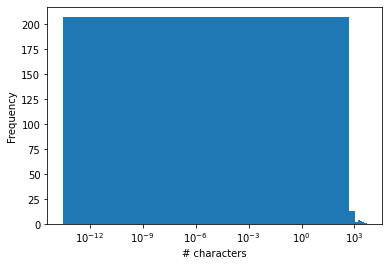

In [ ]:
import matplotlib.pyplot as plt
plt.hist(res.sumChars.to_numpy())
plt.xlabel("# characters")
plt.ylabel("Frequency")
plt.xscale("log")

In [ ]:
!curl https://2.bp.blogspot.com/-eGskF3n8_Ag/XE7F3P_de2I/AAAAAAAAHU8/WJw0un2nHqMGA8cFVtv_yFfpBVQJSYyVACK4BGAYYCw/s1600/Icon-Reddit.png > reddit.png
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("reddit.png"))
text = " ".join([i for i in kdf.selftext.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76154  100 76154    0     0  3098k      0 --:--:-- --:--:-- --:--:-- 3098k


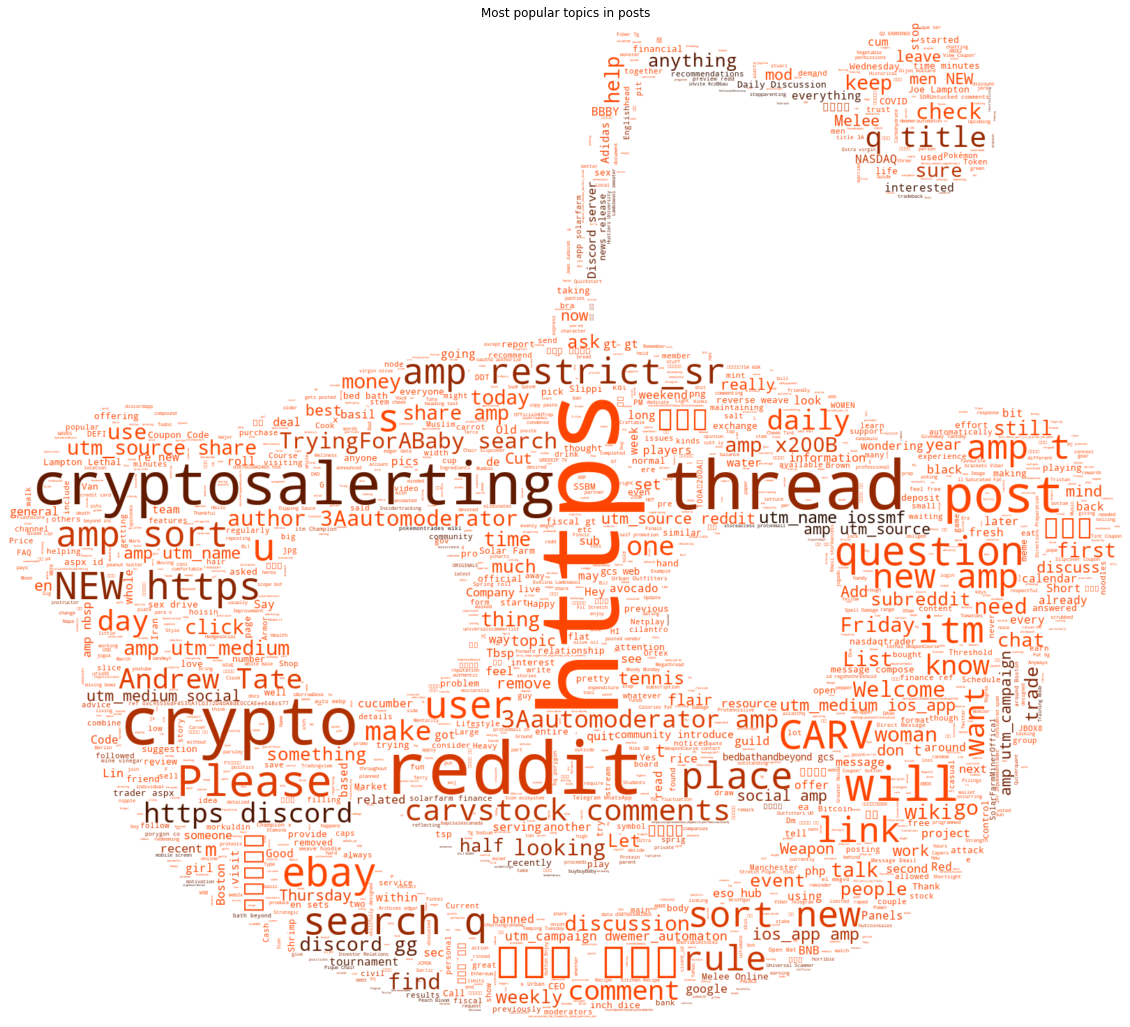

In [ ]:
text = " ".join([i for i in kdf.selftext.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in posts")
plt.axis("off");

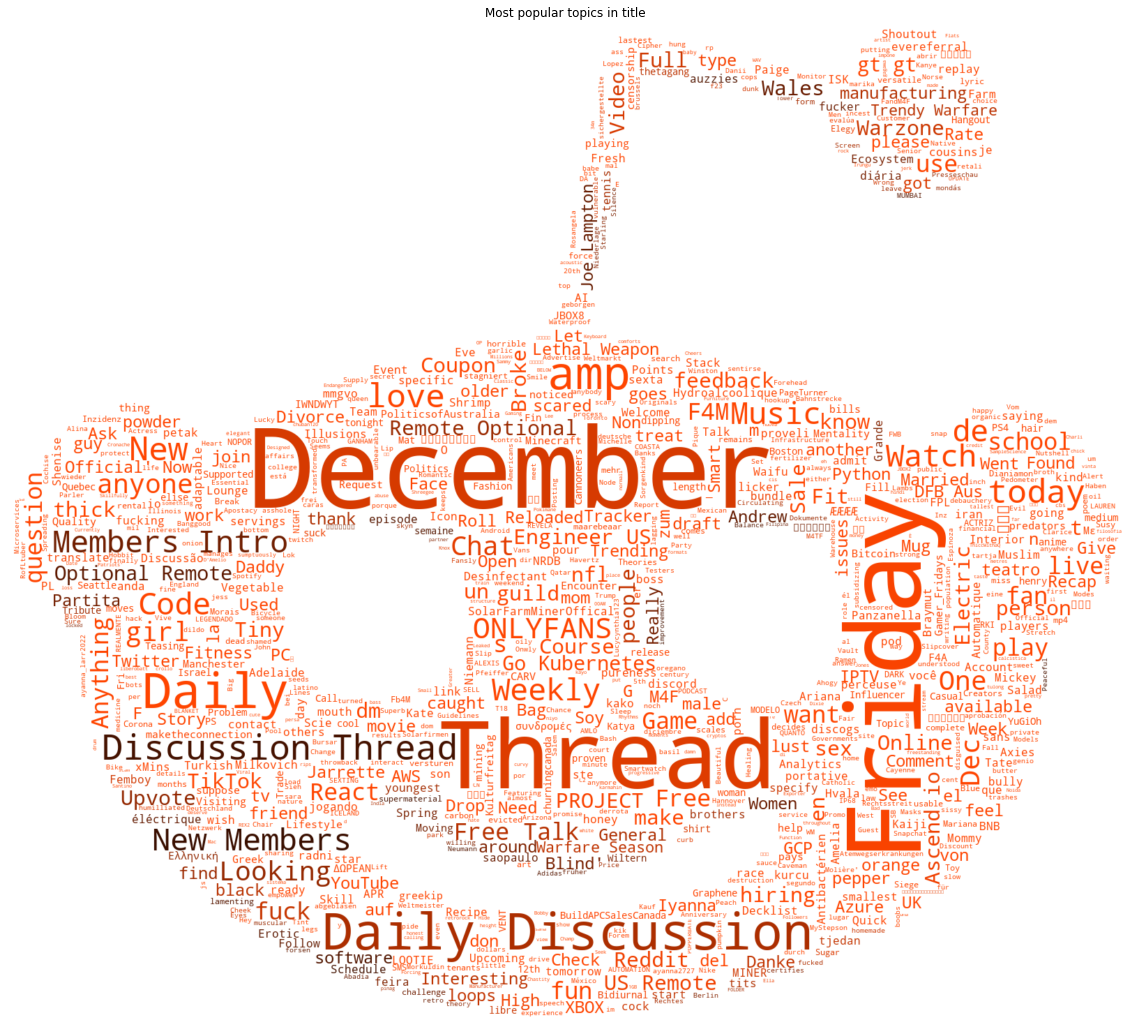

In [ ]:
text = " ".join([i for i in kdf.title.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in title")
plt.axis("off");

In [ ]:
text = " ".join([i for i in kdf.subreddit.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular subreddits")
plt.axis("off");

--------


<font size=10 color=red>Assignment question</font>

Choose a subreddit you like and build a worldcloud using Koalas. Feel free to change the mask or the colors...

--------
Answer:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76154  100 76154    0     0  1906k      0 --:--:-- --:--:-- --:--:-- 1906k


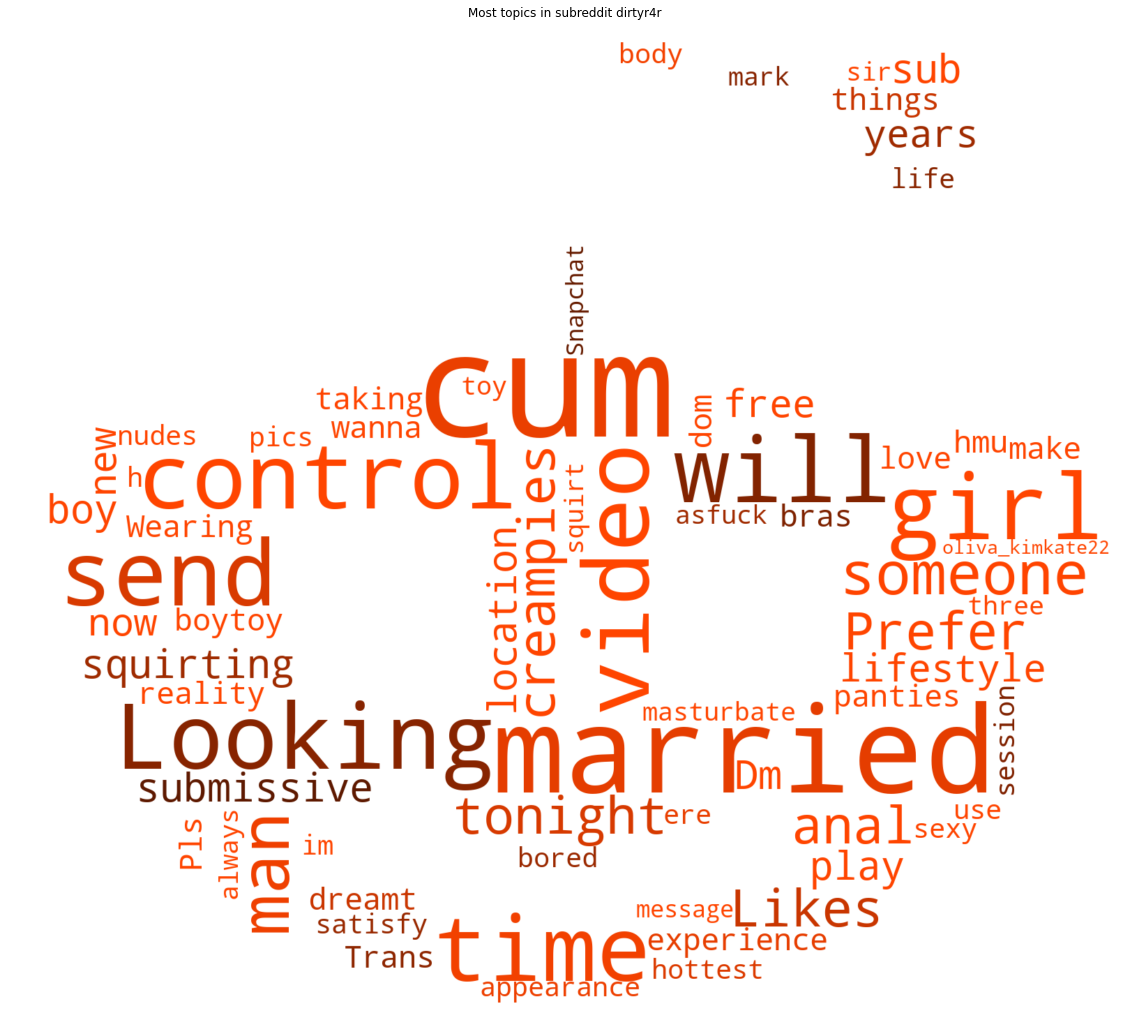

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

!curl https://2.bp.blogspot.com/-eGskF3n8_Ag/XE7F3P_de2I/AAAAAAAAHU8/WJw0un2nHqMGA8cFVtv_yFfpBVQJSYyVACK4BGAYYCw/s1600/Icon-Reddit.png > reddit.png
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("reddit.png"))



# obtenemos el subreddit (me sale uno sin self.text)
kdf = ks.from_pandas(pdf[attrs])
kdf_aux = kdf.filter(items=["subreddit"])
subreddit = kdf.at[0,"subreddit"]

#vamos a recorrerlos para ver el subreddit con más texto
dic = {}
for i, j in zip(kdf.subreddit.to_numpy(), kdf.selftext.to_numpy()):
  if(len(i)>0 and len(j)>0 and i != "[removed]" and i!="[deleted]" and j!= "[removed]" and j!="[deleted]"):
      if i in dic:
        dic[i].append(j)
      else:
        dic[i]=[j]

max_value=max(dic, key=lambda k: len(dic[k]))
#print(max_value, dic[max_value])
#cojo los textos de los validos
#text = " ".join([j for i, j in zip(kdf.subreddit.to_numpy(), kdf.selftext.to_numpy()) if i==max_value])
#print(text)
text = " ".join(dic[max_value])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most topics in subreddit " + max_value)
plt.axis("off");